In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
us = pd.read_csv('C:\\Users\\Maria\\Desktop\\CodeHub\\Jupyter\Project\\users_processed.csv')

In [3]:
us.columns

Index(['Unnamed: 0', 'user_id', 'birth_year', 'city', 'created_date',
       'user_settings_crypto_unlocked', 'plan', 'num_contacts', 'North-East',
       'UK', 'West-South', 'brand', 'number_of_transactions',
       'completed_transactions', 'Perc_comp_transactions',
       'transactions_last_15_days', 'transactions_april_2019',
       'transactions_Jan_Feb_Mar_2019', 'total_amount_usd',
       'total_amount_usd_completed', 'Perc_compl_amount',
       'max_amount_usd_completed', 'min_amount_usd_completed',
       'mean_amount_usd_completed', 'EMAIL', 'PUSH', 'SMS', 'PUSH_sent',
       'EMAIL_sent', 'SMS_sent', 'Agricultural Services', 'Business Services',
       'Car Rental', 'Clothing Stores', 'Contracted Services',
       'Government Services', 'Lodging', 'Miscellaneous Stores',
       'Professional Services and Membership Organizations',
       'Retail Outlet Services', 'Transportation Services',
       'Travel and Entertainment', 'Utility Services', 'Africa', 'Americas',
       'A

## 1. K-means for Clustering

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [5]:
X=us[['birth_year','user_settings_crypto_unlocked','plan','North-East','UK','West-South','brand',
      'Agricultural Services','Business Services','Car Rental','Clothing Stores','Contracted Services',
      'Government Services','Lodging','Miscellaneous Stores','Professional Services and Membership Organizations',
      'Retail Outlet Services', 'Transportation Services','Travel and Entertainment','Utility Services','Perc_compl_amount',
      'Africa','Americas','Asia','North-Europe','Oceania', 'South-Europe']]

In [6]:
matrix = X.values
for k in range(3, 10):
    kmeans = KMeans(n_clusters=k, n_init=30, random_state=1000)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    print("For k =", k, "The average silhouette_score is :", silhouette_avg)

For k = 3 The average silhouette_score is : 0.640329006539802
For k = 4 The average silhouette_score is : 0.5286498756808522
For k = 5 The average silhouette_score is : 0.449270264839907
For k = 6 The average silhouette_score is : 0.4299866516093709
For k = 7 The average silhouette_score is : 0.37850979270706575
For k = 8 The average silhouette_score is : 0.3833129415524304
For k = 9 The average silhouette_score is : 0.37889413023978086


In [7]:
k = 3
kmeans = KMeans(n_clusters = k, n_init=30)
kmeans.fit(matrix)
clusters = kmeans.predict(matrix)

In [8]:
pd.Series(clusters).value_counts()

1    13234
2     1984
0      326
dtype: int64

In [9]:
kmeans.cluster_centers_

array([[1.98693558e+03, 4.07975460e-01, 3.52760736e-01, 3.55828221e-01,
        4.50920245e-01, 1.93251534e-01, 5.46012270e-01, 5.12269939e-01,
        3.56104294e+01, 2.45398773e-01, 1.68190184e+01, 1.05828221e+00,
        2.18098160e+00, 7.94478528e-01, 3.36276074e+02, 7.63803681e+00,
        1.96573620e+02, 8.84969325e+01, 2.92331288e+00, 8.74846626e+00,
        8.69606567e+01, 2.75153374e+00, 2.05582822e+01, 8.70858896e+00,
        6.45315951e+02, 3.28220859e+00, 1.71656442e+01],
       [1.98313214e+03, 1.58204896e-01, 4.99395588e-02, 3.26155938e-01,
        3.73526745e-01, 3.00317316e-01, 4.94031429e-01, 1.14158356e-01,
        2.45950438e+00, 4.30643699e-02, 1.41523119e+00, 3.86823814e-02,
        2.38667271e-01, 1.35388335e-01, 1.85824267e+01, 5.84995467e-01,
        9.68124811e+00, 3.91273799e+00, 2.19552735e-01, 6.75581747e-01,
        7.95923758e+01, 5.16696887e-01, 5.31610759e+00, 2.89347235e+00,
        2.14506649e+01, 1.26261710e+00, 6.63047749e+00],
       [1.98669828e+03

In [10]:
c=kmeans.cluster_centers_  

In [11]:
names =['birth_year','user_settings_crypto_unlocked','plan','North-East','UK','West-South','brand',
        'Agricultural Services','Business Services','Car Rental','Clothing Stores','Contracted Services',
        'Government Services','Lodging','Miscellaneous Stores','Professional Services and Membership Organizations',
        'Retail Outlet Services','Transportation Services','Travel and Entertainment','Utility Services','Perc_compl_amount',
        'Africa','Americas','Asia','North-Europe','Oceania', 'South-Europe']

In [12]:
clusters1 = pd.DataFrame(clusters)

In [13]:
us['clusters'] = clusters1

In [14]:
us.head()

,Unnamed: 0,user_id,birth_year,city,created_date,user_settings_crypto_unlocked,plan,num_contacts,North-East,UK,...,Transportation Services,Travel and Entertainment,Utility Services,Africa,Americas,Asia,North-Europe,Oceania,South-Europe,clusters
0,0,user_0,1992,1,1,0,0,3,0,1,...,20.0,0.0,1.0,0.0,0.0,0.0,335.0,0.0,9.0,2
1,1,user_1,1985,0,1,1,0,75,1,0,...,11.0,0.0,0.0,0.0,0.0,27.0,47.0,17.0,0.0,1
2,2,user_2,1996,0,1,0,0,71,1,0,...,5.0,0.0,0.0,0.0,0.0,0.0,106.0,0.0,0.0,1
3,3,user_3,1981,1,1,0,0,219,1,0,...,3.0,0.0,2.0,0.0,9.0,0.0,119.0,0.0,0.0,2
4,4,user_4,1992,1,1,0,0,0,0,1,...,19.0,0.0,0.0,0.0,1.0,0.0,36.0,0.0,6.0,1


Text(0, 0.5, 'Perc_compl_amount')

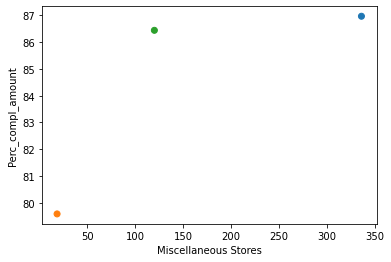

In [15]:
x1=14
x2=20
plt.scatter(c[:,x1],c[:,x2],c=['C0','C1','C2'])
plt.xlabel(names[x1])
plt.ylabel(names[x2])

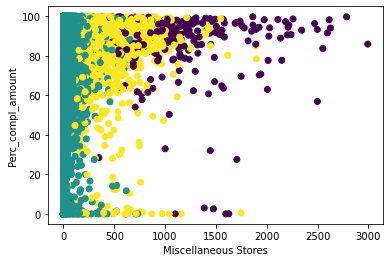

In [16]:
x1=14
x2=20
plt.scatter(c[:,x1],c[:,x2],c=['C0','C1','C2'])
plt.xlabel(names[x1])
plt.ylabel(names[x2])
plt.scatter(us.loc[:,'completed_transactions'],matrix[:,x2], c=clusters)

Text(0, 0.5, 'West-South')

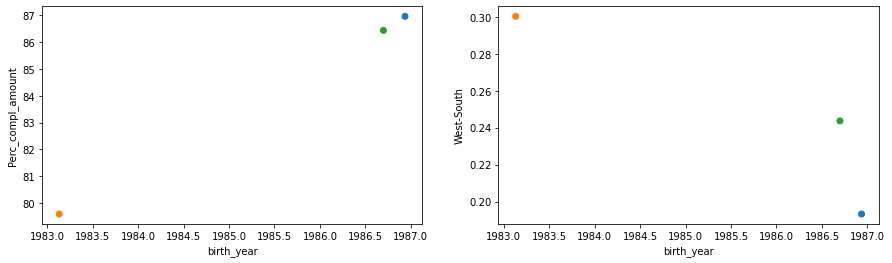

In [17]:
plt.figure(figsize=(15, 4))
ax1 = plt.subplot(121)
x1=0
x2=20
plt.scatter(c[:,x1],c[:,x2],c=['C0','C1','C2'])
plt.xlabel(names[x1])
plt.ylabel(names[x2])
ax2 = plt.subplot(122)
x3=0
x4=5
plt.scatter(c[:,x3],c[:,x4],c=['C0','C1','C2'])
plt.xlabel(names[x3])
plt.ylabel(names[x4])

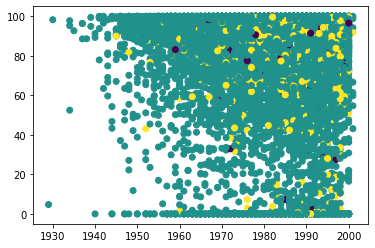

In [18]:
plt.scatter(matrix[:,x1],matrix[:,x2], c=clusters)

In [19]:
us[clusters==0]['completed_transactions']

7         769.0
66       1224.0
111      1574.0
112       635.0
254      2110.0
          ...  
15344    1195.0
15372     927.0
15500     972.0
15525     610.0
15541    1062.0
Name: completed_transactions, Length: 326, dtype: float64

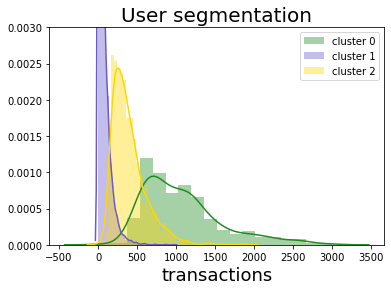

In [21]:
sns.distplot(us[clusters==0]['completed_transactions'],color='forestgreen')
sns.distplot(us[clusters==1]['completed_transactions'],color='slateblue')
sns.distplot(us[clusters==2]['completed_transactions'],color='gold')
plt.ylim([0,0.003])
plt.xlabel('transactions', fontsize=18)
plt.title('User segmentation',fontsize=20)
plt.legend(labels=['cluster 0','cluster 1','cluster 2'])